<a href="https://colab.research.google.com/github/FahmidAhmed1/California-House-Cost-Analysis/blob/Test-Branch/Data_Science_Project_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Importing the necessary libaries  HAVENT IMPORTED SKYKITLEARN!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Change the path when putting on Jupiter, select copy path
path = "/content/drive/MyDrive/Housing.csv"
df = pd.read_csv(path)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.info()
# There are missing values and are not all the same amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# Droping the blank values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [21]:
# Preparing the data for the model, need to split the data into 80/20 ratio for training/testing
from sklearn.model_selection import train_test_split
x = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
test_data = x_test.join(y_test)
train_data = x_train.join(y_train)

# The training portion has 80% of the data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8043,-118.16,33.84,36.0,2831.0,573.0,1462.0,569.0,3.8646,<1H OCEAN,214600.0
19866,-119.32,36.33,18.0,2603.0,478.0,1158.0,423.0,4.5938,INLAND,150500.0
14738,-117.05,32.59,26.0,1919.0,345.0,1326.0,341.0,4.2679,NEAR OCEAN,131900.0
14878,-117.07,32.64,38.0,1486.0,269.0,745.0,295.0,4.6477,NEAR OCEAN,150400.0
4757,-118.34,34.04,35.0,2345.0,607.0,2042.0,565.0,2.5955,<1H OCEAN,139700.0
...,...,...,...,...,...,...,...,...,...,...
8553,-118.30,33.74,28.0,1065.0,215.0,887.0,217.0,3.9375,NEAR OCEAN,270500.0
14682,-117.08,32.82,16.0,1787.0,236.0,770.0,228.0,7.1298,<1H OCEAN,278600.0
749,-122.05,37.68,32.0,2015.0,318.0,1019.0,340.0,6.1104,NEAR BAY,240700.0
10788,-117.91,33.64,38.0,2222.0,542.0,1067.0,512.0,2.8553,<1H OCEAN,307600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

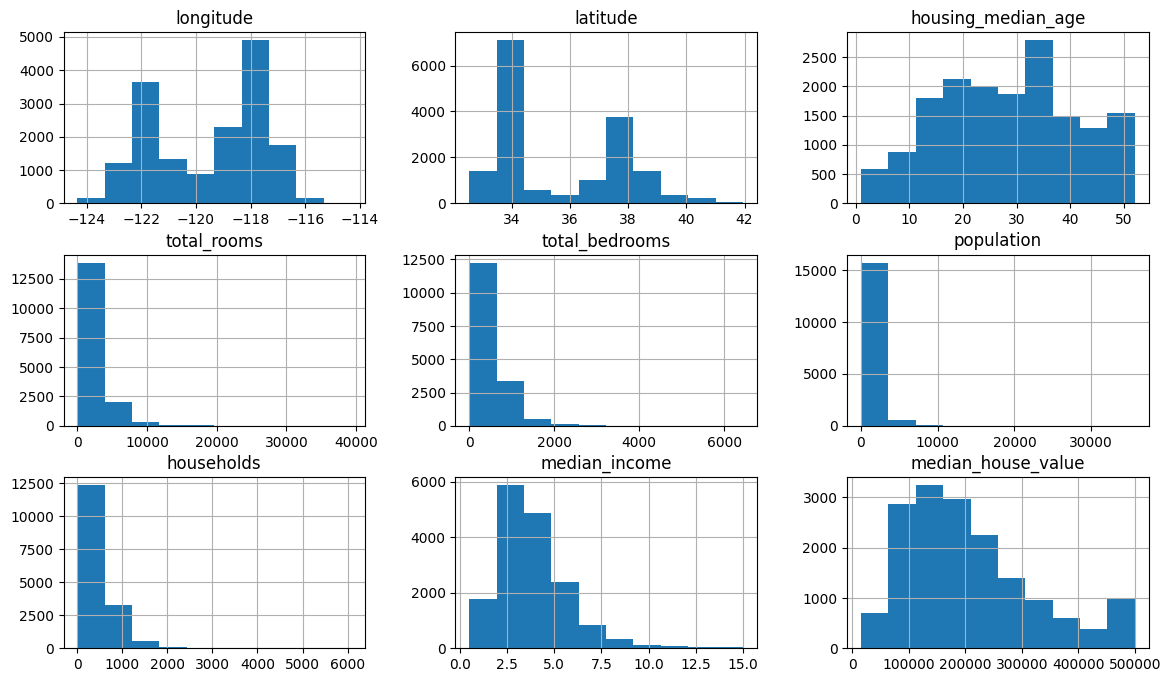

In [22]:
# Displaying the initial histogram where the distribution of some features aren't representing a 'normal distribution'/'Gaussian distribution' shape and appear to have a 'right skewed' distribution shape instead
train_data.hist(figsize= (14,8))

In [23]:
# Applying the logmetric function will help normalize the data distribution since it will be used for linear regression algorithum (which assumes the data is normalized) and also enhances the visualization of the data
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

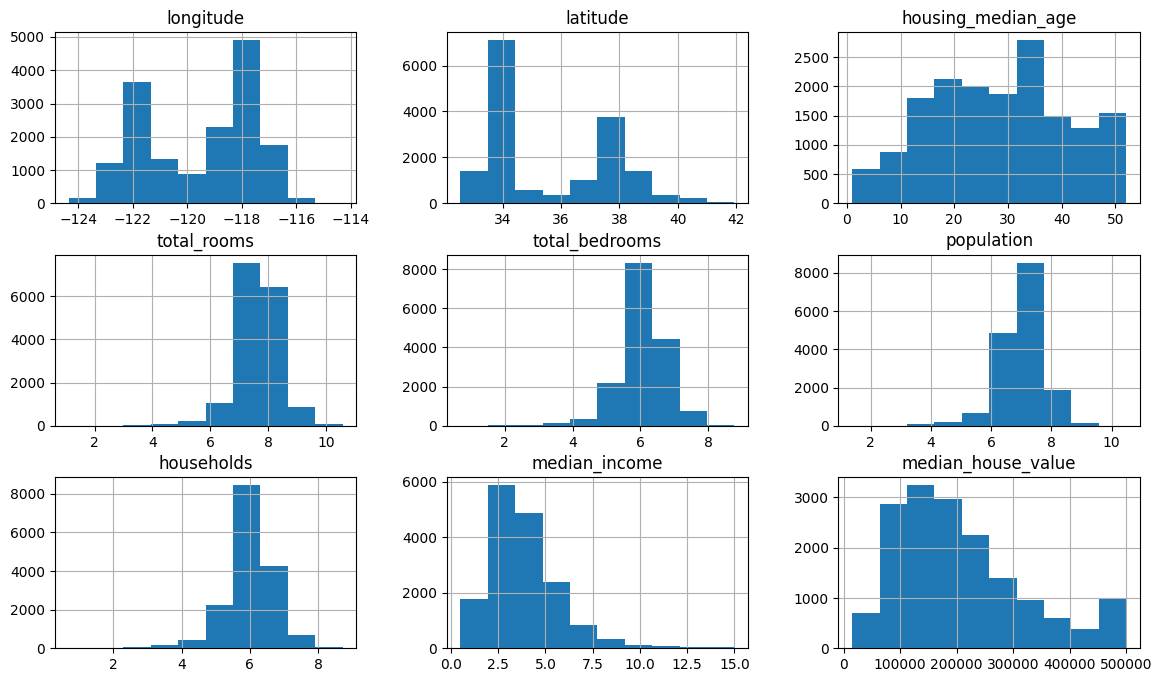

In [24]:
# Printing out the refined histogram with a 'normal distribution'/'Gaussian distribution' shape
train_data.hist(figsize= (14,8))

In [25]:
# Checking all the unique values from the Ocean Proximity variable since it is a categorical variable
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7234
INLAND        5173
NEAR OCEAN    2099
NEAR BAY      1837
ISLAND           3
Name: count, dtype: int64

In [26]:
test_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     1800
INLAND        1323
NEAR OCEAN     529
NEAR BAY       433
ISLAND           2
Name: count, dtype: int64

In [27]:
# Using the python get dummies libary to use One-Hot Encoding technique which allows the data to convert from a categorical to numeric value
pd.get_dummies(train_data.ocean_proximity)

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, prefix=''))
train_data = train_data.drop(['ocean_proximity'], axis =1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
8043,-118.16,33.84,36.0,7.948738,6.352629,7.288244,6.345636,3.8646,214600.0,True,False,False,False,False
19866,-119.32,36.33,18.0,7.864804,6.171701,7.055313,6.049733,4.5938,150500.0,False,True,False,False,False
14738,-117.05,32.59,26.0,7.560080,5.846439,7.190676,5.834811,4.2679,131900.0,False,False,False,False,True
14878,-117.07,32.64,38.0,7.304516,5.598422,6.614726,5.690359,4.6477,150400.0,False,False,False,False,True
4757,-118.34,34.04,35.0,7.760467,6.410175,7.622175,6.338594,2.5955,139700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,-118.30,33.74,28.0,6.971669,5.375278,6.788972,5.384495,3.9375,270500.0,False,False,False,False,True
14682,-117.08,32.82,16.0,7.488853,5.468060,6.647688,5.433722,7.1298,278600.0,True,False,False,False,False
749,-122.05,37.68,32.0,7.608871,5.765191,6.927558,5.831882,6.1104,240700.0,False,False,False,True,False
10788,-117.91,33.64,38.0,7.706613,6.297109,6.973543,6.240276,2.8553,307600.0,True,False,False,False,False


<Axes: >

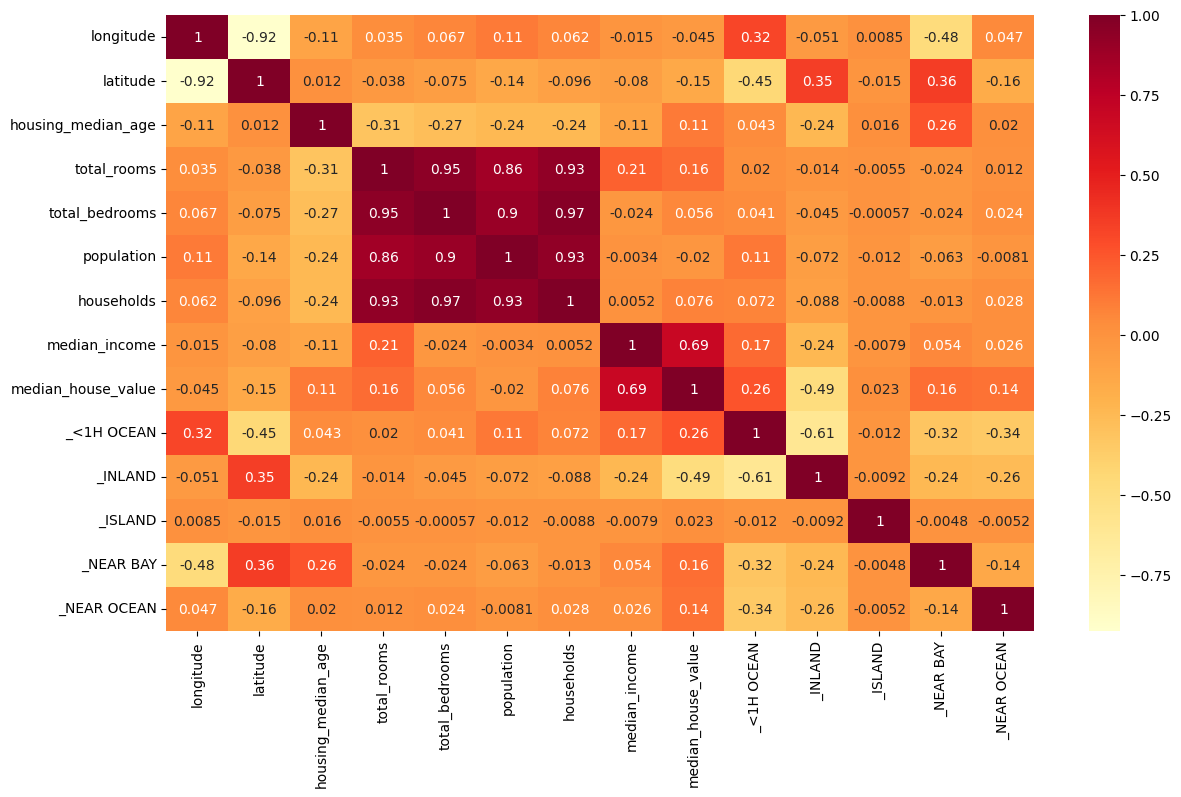

In [28]:
# Ensuring the new features have value and the correlation between other features using the seaborn libary
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")

<Axes: xlabel='latitude', ylabel='longitude'>

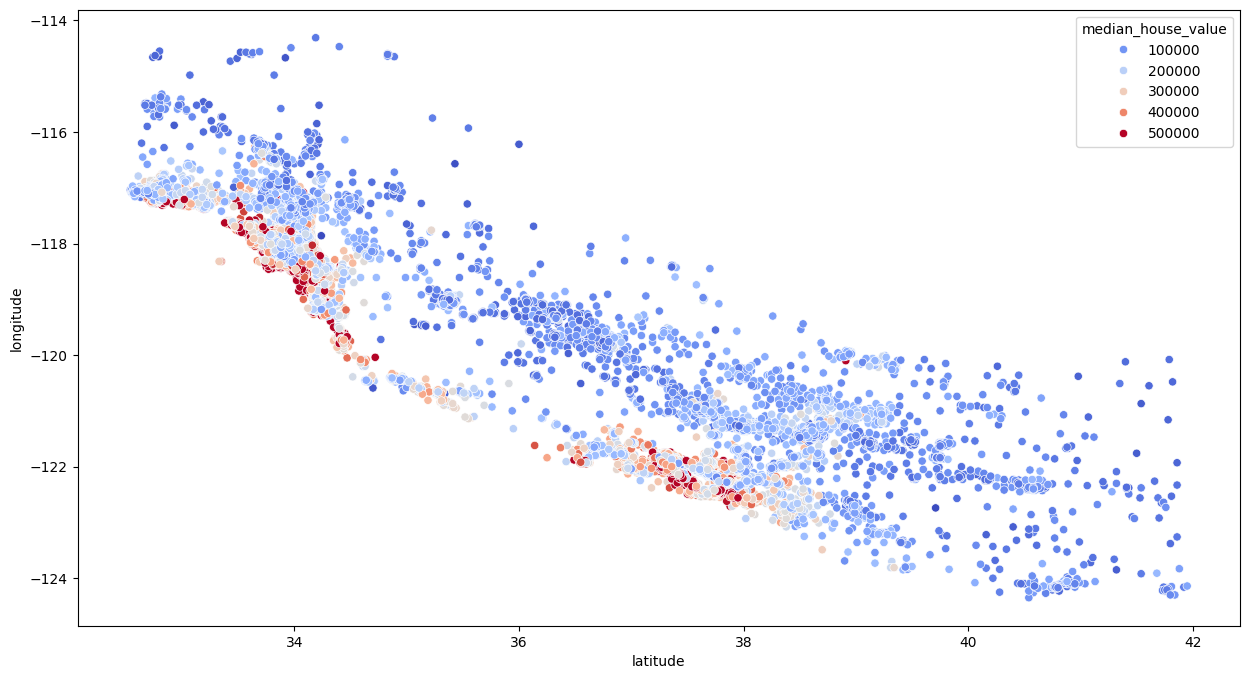

In [29]:
# Displaying a scatter plot using the seaborn libary to visualize the relationship between location and price (mapping out the Calafornia state).
plt.figure(figsize = (15,8))

# The latitude and longitude variables are used to plot with the median house prices. Locations with higher prices are highlighted in Red, while those with lower prices are highlighted in Blue.
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette= "coolwarm")

<Axes: >

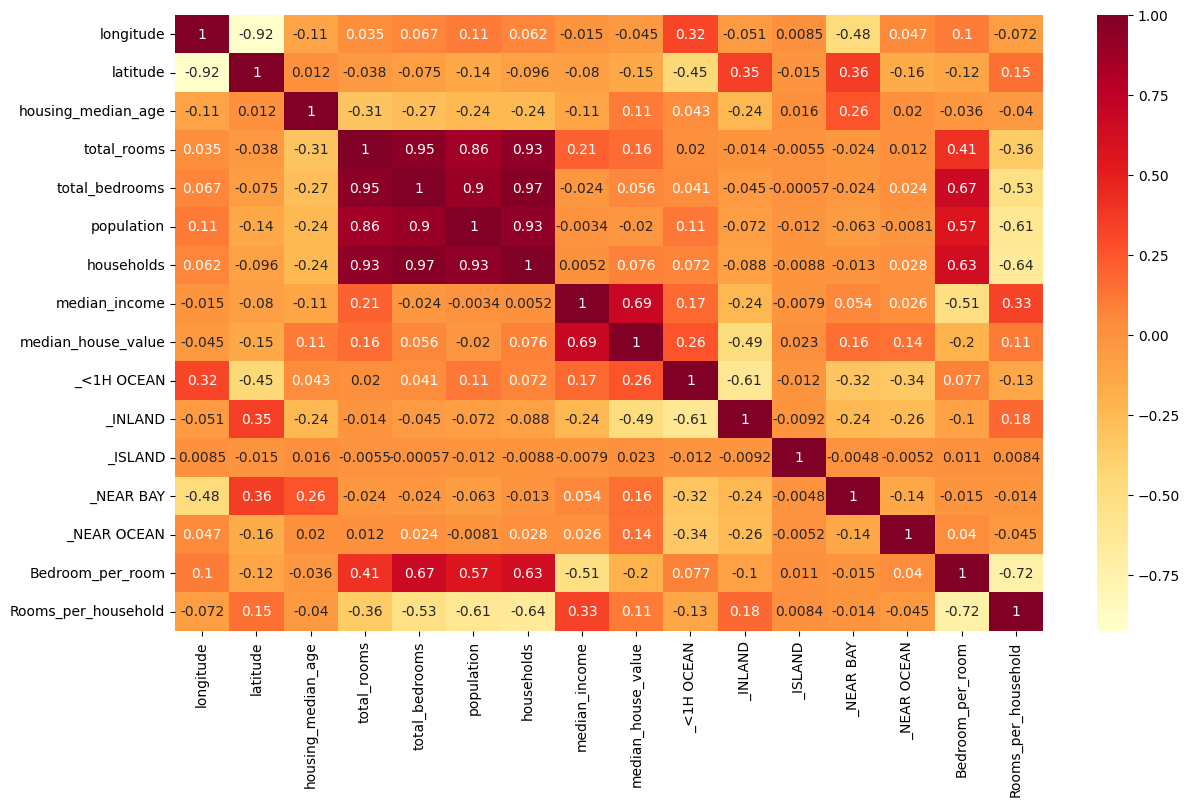

In [31]:
# Feature engineering to create features that help provide further insights into our data
train_data["Bedroom_per_room"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["Rooms_per_household"] = train_data["total_rooms"]/train_data["households"]

# Visualizing the correlation of variables/freatures
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot = True, cmap="YlOrRd")



In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,Bedroom_per_room,Rooms_per_household
8043,-118.16,33.84,36.0,7.948738,6.352629,7.288244,6.345636,3.8646,214600.0,True,False,False,False,False,0.799200,1.252631
19866,-119.32,36.33,18.0,7.864804,6.171701,7.055313,6.049733,4.5938,150500.0,False,True,False,False,False,0.784724,1.300025
14738,-117.05,32.59,26.0,7.560080,5.846439,7.190676,5.834811,4.2679,131900.0,False,False,False,False,True,0.773330,1.295686
14878,-117.07,32.64,38.0,7.304516,5.598422,6.614726,5.690359,4.6477,150400.0,False,False,False,False,True,0.766433,1.283665
4757,-118.34,34.04,35.0,7.760467,6.410175,7.622175,6.338594,2.5955,139700.0,True,False,False,False,False,0.826004,1.224320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,-118.30,33.74,28.0,6.971669,5.375278,6.788972,5.384495,3.9375,270500.0,False,False,False,False,True,0.771017,1.294767
14682,-117.08,32.82,16.0,7.488853,5.468060,6.647688,5.433722,7.1298,278600.0,True,False,False,False,False,0.730160,1.378218
749,-122.05,37.68,32.0,7.608871,5.765191,6.927558,5.831882,6.1104,240700.0,False,False,False,True,False,0.757693,1.304702
10788,-117.91,33.64,38.0,7.706613,6.297109,6.973543,6.240276,2.8553,307600.0,True,False,False,False,False,0.817105,1.234980


In [33]:
# Creating a model that uses linear regression using scikit learn libaray
from sklearn.linear_model import LinearRegression

# Split the data since the test data doesn't have the new features found in the training data
x_train, y_train = train_data.drop(["median_house_value"], axis =1), train_data["median_house_value"]
LinReg = LinearRegression()

LinReg.fit(x_train, y_train)

LinearRegression()

In [34]:
# Running the test data set
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8112,-118.20,33.79,47.0,2549.0,626.0,1388.0,606.0,3.0135,NEAR OCEAN,192700.0
10290,-117.82,33.88,15.0,5392.0,895.0,2531.0,827.0,6.2185,<1H OCEAN,280300.0
1144,-121.41,39.72,17.0,1583.0,331.0,730.0,306.0,2.3895,INLAND,87500.0
18993,-122.07,38.41,17.0,3053.0,595.0,1434.0,557.0,3.4741,INLAND,245800.0
15768,-122.44,37.77,52.0,2537.0,559.0,849.0,530.0,5.1788,NEAR BAY,476900.0
...,...,...,...,...,...,...,...,...,...,...
11396,-117.97,33.73,19.0,4154.0,560.0,2130.0,589.0,7.2845,<1H OCEAN,301800.0
11353,-117.92,33.75,32.0,790.0,199.0,1196.0,201.0,3.0625,<1H OCEAN,142800.0
18308,-122.11,37.41,35.0,2712.0,428.0,1084.0,425.0,7.1382,NEAR BAY,443800.0
7876,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN,168200.0


In [35]:

# Applying the logemetric function the the test data to ensure normal distribution of the features before going into the linear regression algorithum
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

# One Hot encoding again to turn the ocean_proximity column into numeric values
#test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)
pd.get_dummies(test_data.ocean_proximity)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, prefix=''))
test_data = test_data.drop(['ocean_proximity'], axis =1)

# Feature engineering just like in the training data
test_data["Bedroom_per_room"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["Rooms_per_household"] = test_data["total_rooms"]/test_data["households"]
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,Bedroom_per_room,Rooms_per_household
8112,-118.20,33.79,47.0,7.843849,6.440947,7.236339,6.408529,3.0135,192700.0,False,False,False,False,True,0.821146,1.223970
10290,-117.82,33.88,15.0,8.592857,6.797940,7.836765,6.719013,6.2185,280300.0,True,False,False,False,False,0.791115,1.278887
1144,-121.41,39.72,17.0,7.367709,5.805135,6.594413,5.726848,2.3895,87500.0,False,True,False,False,False,0.787916,1.286521
18993,-122.07,38.41,17.0,8.024207,6.390241,7.268920,6.324359,3.4741,245800.0,False,True,False,False,False,0.796370,1.268778
15768,-122.44,37.77,52.0,7.839132,6.327937,6.745236,6.274762,5.1788,476900.0,False,False,False,True,False,0.807224,1.249311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,-117.97,33.73,19.0,8.332068,6.329721,7.664347,6.380123,7.2845,301800.0,True,False,False,False,False,0.759682,1.305942
11353,-117.92,33.75,32.0,6.673298,5.298317,7.087574,5.308268,3.0625,142800.0,True,False,False,False,False,0.793958,1.257152
18308,-122.11,37.41,35.0,7.905810,6.061457,6.989335,6.054439,7.1382,443800.0,False,False,False,True,False,0.766709,1.305787
7876,-118.14,33.88,24.0,8.103494,6.890609,7.643004,6.782192,2.6641,168200.0,True,False,False,False,False,0.850326,1.194819


In [36]:
x_test, y_test = test_data.drop(["median_house_value"], axis =1), test_data['median_house_value']

In [37]:
# Printing out the score using linear regression and comparing model predictions to the labeled data
x =LinReg.score(x_test, y_test)
x*100

67.35008622802454

In [39]:
# Use the Random Forest Regression algorithum to check if it has any imporvements compared to Linear Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
# Training the model
forest.fit(x_train,y_train)

# Analyzing the result by testing the model using the test data
result = forest.score(x_test,y_test)
result*100

81.708517347344

In [40]:
# Importing necessary module for grid search cross-validation
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
# Defining the parameter grid to search over with the different numbers of trees in the forest and the different maximum number of features to consider for each split
param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}
# Using the negated mean squared error to allow scikit-learn to maximize the performance score by transforming the mean squared error into a positive or zero value
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
# Returning the best-performing Random Forest model from the grid search and applying to into the test dataset to output the final score
best_forest = grid_search.best_estimator_
best_score = best_forest.score(x_test, y_test)
print(best_score*100)


81.48637900560199


In [53]:
# Overall, we can see with the Random Forest Regression Algorithum it has a much better accuracy than Linear Regression and with hyperparameter tunning we get even better results